In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
y = data.target
x = data.data[:, [1, 2]][y != 0]         
y = y[y != 0].reshape(-1, 1)              

df = pd.DataFrame(
    data = np.hstack([x, y]),
    columns = ['Sepal Width', 'Petal Length', 'Class']
)
df['Class'] = df['Class'].astype(int)
df.head(10)

,Sepal Width,Petal Length,Class
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
5,2.8,4.5,1
6,3.3,4.7,1
7,2.4,3.3,1
8,2.9,4.6,1
9,2.7,3.9,1


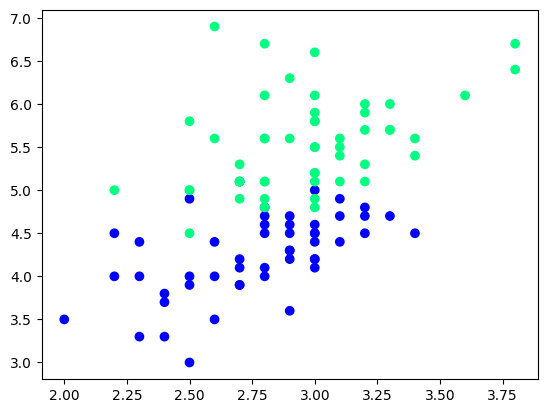

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x = x[:,0],y = x[:,1],c = y[:,0],cmap='winter')

In [4]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [5]:
df_train

,Sepal Width,Petal Length,Class
69,2.2,5.0,2
75,3.2,6.0,2
52,3.0,5.9,2
71,2.8,4.9,2
99,3.0,5.1,2
12,2.2,4.0,1
55,3.0,6.6,2
37,2.3,4.4,1
43,2.3,3.3,1
40,2.6,4.4,1


In [6]:
df_val

,Sepal Width,Petal Length,Class
10,2.0,3.5,1
16,3.0,4.5,1
2,3.1,4.9,1
7,2.4,3.3,1
54,3.0,5.8,2


In [7]:
df_test

,Sepal Width,Petal Length,Class
8,2.9,4.6,1
97,3.0,5.2,2
6,3.3,4.7,1
20,3.2,4.8,1
25,3.0,4.4,1


In [8]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [9]:
print(x_test,y_test,sep="\n\n")

[[2.  3.5]
 [3.  4.5]
 [3.1 4.9]
 [2.4 3.3]
 [3.  5.8]]

[1 1 1 1 2]


Case 1: Bagging


In [10]:
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal Width,Petal Length,Class
99,3.0,5.1,2
55,3.0,6.6,2
71,2.8,4.9,2
75,3.2,6.0,2
43,2.3,3.3,1
43,2.3,3.3,1
52,3.0,5.9,2
52,3.0,5.9,2


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [12]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=1)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

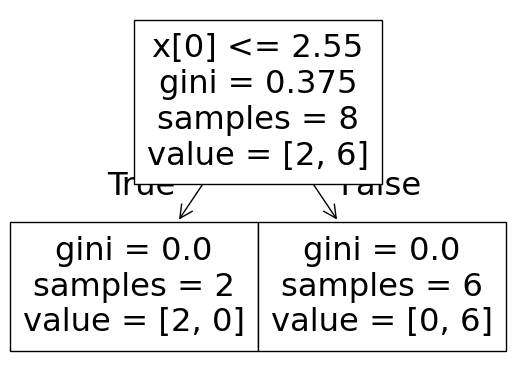

C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


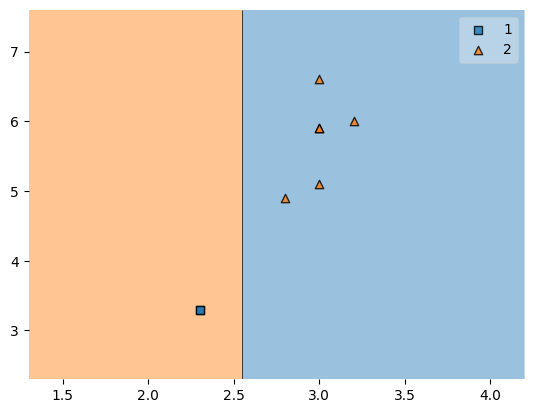

In [13]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,x,y)

In [14]:
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal Width,Petal Length,Class
40,2.6,4.4,1
69,2.2,5.0,2
71,2.8,4.9,2
69,2.2,5.0,2
69,2.2,5.0,2
12,2.2,4.0,1
71,2.8,4.9,2
55,3.0,6.6,2


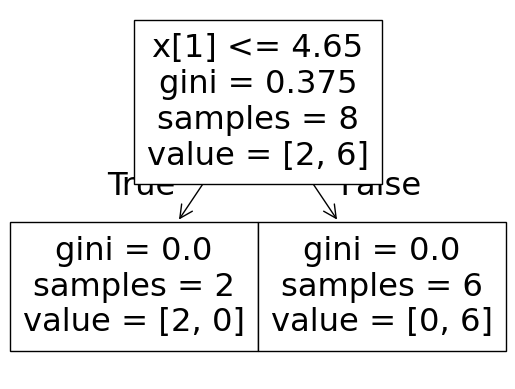

C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


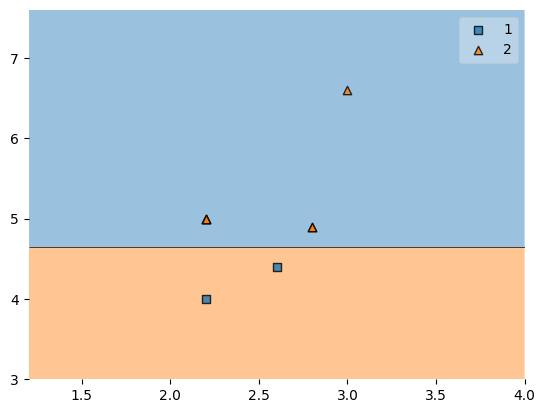

In [15]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

In [16]:
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal Width,Petal Length,Class
40,2.6,4.4,1
43,2.3,3.3,1
99,3.0,5.1,2
71,2.8,4.9,2
71,2.8,4.9,2
71,2.8,4.9,2
55,3.0,6.6,2
55,3.0,6.6,2


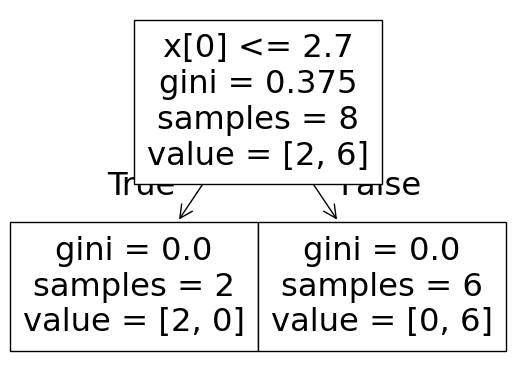

C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


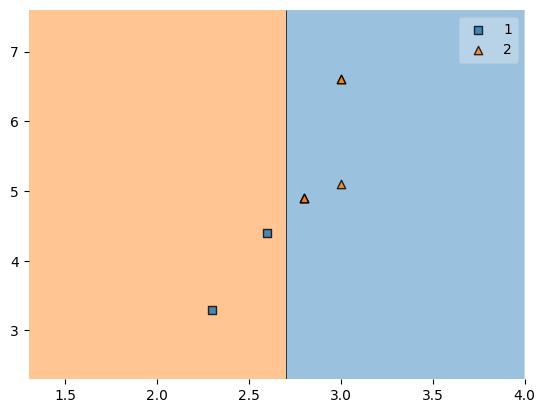

In [17]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

In [18]:
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal Width,Petal Length,Class
99,3.0,5.1,2
12,2.2,4.0,1
55,3.0,6.6,2
69,2.2,5.0,2
55,3.0,6.6,2
12,2.2,4.0,1
43,2.3,3.3,1
52,3.0,5.9,2


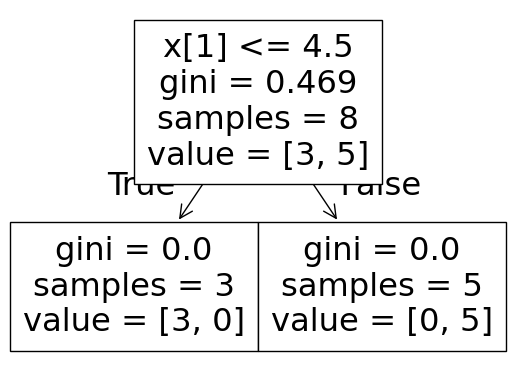

0.8


C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


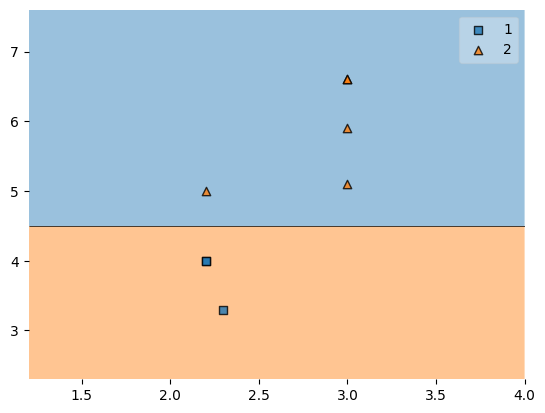

In [19]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

In [20]:
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal Width,Petal Length,Class
37,2.3,4.4,1
40,2.6,4.4,1
75,3.2,6.0,2
75,3.2,6.0,2
55,3.0,6.6,2
52,3.0,5.9,2
69,2.2,5.0,2
52,3.0,5.9,2


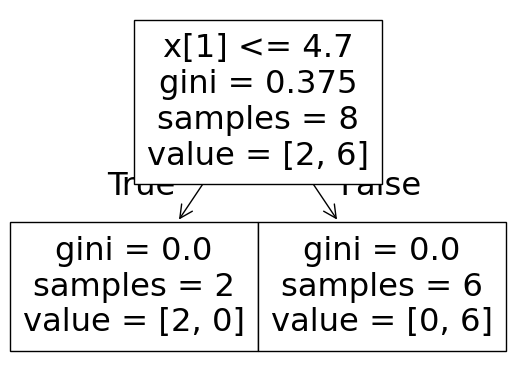

C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


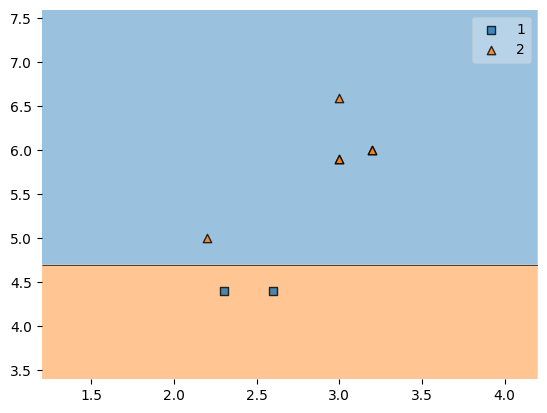

In [21]:
dt_bag4 = DecisionTreeClassifier()
evaluate(dt_bag4,x,y)

In [22]:
df_bag = df_train.sample(8,replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal Width,Petal Length,Class
12,2.2,4.0,1
37,2.3,4.4,1
40,2.6,4.4,1
69,2.2,5.0,2
40,2.6,4.4,1
43,2.3,3.3,1
43,2.3,3.3,1
55,3.0,6.6,2


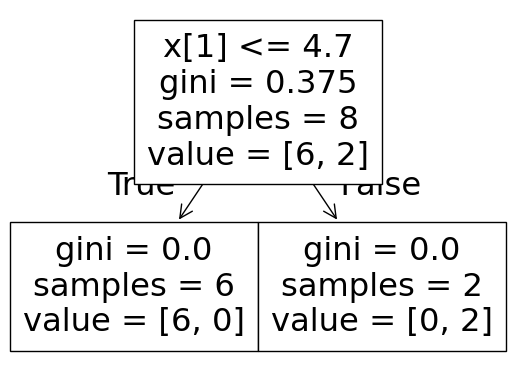

C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


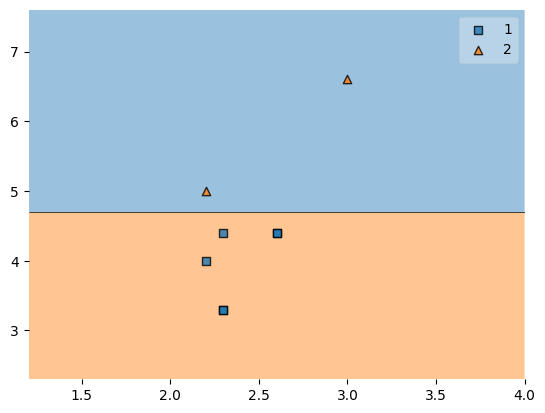

In [23]:
dt_bag5 = DecisionTreeClassifier()
evaluate(dt_bag5,x,y)

In [24]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


Predict


In [25]:
df_test

,Sepal Width,Petal Length,Class
8,2.9,4.6,1
97,3.0,5.2,2
6,3.3,4.7,1
20,3.2,4.8,1
25,3.0,4.4,1


In [ ]:
#on a random point from above -> shld give 1
print("Predictor 1",dt_bag1.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 4",dt_bag4.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 5",dt_bag5.predict(np.array([2.9,4.6]).reshape(1,2)))


Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]
Predictor 4 [1]
Predictor 5 [1]


In [ ]:
#on a random point from above -> shld give 2
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.2]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,5.2]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,5.2]).reshape(1,2)))
print("Predictor 4",dt_bag4.predict(np.array([3.0,5.2]).reshape(1,2)))
print("Predictor 5",dt_bag5.predict(np.array([3.0,5.2]).reshape(1,2)))


Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]
Predictor 4 [2]
Predictor 5 [2]


Pasting


In [29]:
df_train

,Sepal Width,Petal Length,Class
69,2.2,5.0,2
75,3.2,6.0,2
52,3.0,5.9,2
71,2.8,4.9,2
99,3.0,5.1,2
12,2.2,4.0,1
55,3.0,6.6,2
37,2.3,4.4,1
43,2.3,3.3,1
40,2.6,4.4,1


In [ ]:
df_train.sample(8) # same above thing, with replace= False


,Sepal Width,Petal Length,Class
52,3.0,5.9,2
12,2.2,4.0,1
71,2.8,4.9,2
69,2.2,5.0,2
37,2.3,4.4,1
75,3.2,6.0,2
40,2.6,4.4,1
99,3.0,5.1,2


Random Subspaces


In [31]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Class'] = data.target.astype(int)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:

df.sample(2,replace=True,axis=1) # sampling but with columns now.

,petal width (cm),sepal length (cm)
0,0.2,5.1
1,0.2,4.9
2,0.2,4.7
3,0.2,4.6
4,0.2,5.0
...,...,...
145,2.3,6.7
146,1.9,6.3
147,2.0,6.5
148,2.3,6.2


Random Patches

In [ ]:

df.sample(8,replace=True).sample(2,replace=True,axis=1) # both combined

,petal width (cm),petal length (cm)
129,1.6,5.8
112,2.1,5.5
118,2.3,6.9
59,1.4,3.9
98,1.1,3.0
18,0.3,1.7
136,2.4,5.6
62,1.0,4.0
